In [1]:
import pandas as pd
import re



# Data Preparation



In [5]:
df =  pd.read_csv('C:/Users/amema/OneDrive/Desktop/s3_/footballresults/results.csv')

In [6]:
df["date"] = pd.to_datetime(df["date"])

In [7]:
df.isna().sum()

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          4
country       0
neutral       0
dtype: int64

In [8]:
df.dropna(inplace=True)

In [9]:
df.dtypes

date          datetime64[ns]
home_team             object
away_team             object
home_score             int64
away_score             int64
tournament            object
city                  object
country               object
neutral                 bool
dtype: object

In [10]:
df.sort_values("date").tail()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
44336,2022-12-04,England,Senegal,3,0,FIFA World Cup,Al Khor,Qatar,True
44337,2022-12-05,Japan,Croatia,1,1,FIFA World Cup,Al Wakrah,Qatar,True
44338,2022-12-05,Brazil,South Korea,4,1,FIFA World Cup,Doha,Qatar,True
44339,2022-12-06,Morocco,Spain,0,0,FIFA World Cup,Al Rayyan,Qatar,True
44340,2022-12-06,Portugal,Switzerland,6,1,FIFA World Cup,Lusail,Qatar,True


In [11]:
df = df[(df["date"] >= "2018-8-1")].reset_index(drop=True)

In [12]:
df.sort_values("date").tail()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
3914,2022-12-04,England,Senegal,3,0,FIFA World Cup,Al Khor,Qatar,True
3915,2022-12-05,Japan,Croatia,1,1,FIFA World Cup,Al Wakrah,Qatar,True
3916,2022-12-05,Brazil,South Korea,4,1,FIFA World Cup,Doha,Qatar,True
3917,2022-12-06,Morocco,Spain,0,0,FIFA World Cup,Al Rayyan,Qatar,True
3918,2022-12-06,Portugal,Switzerland,6,1,FIFA World Cup,Lusail,Qatar,True


In [13]:
df.home_team.value_counts()

United States    46
Mexico           43
Qatar            43
Japan            42
South Korea      39
                 ..
Chameria          1
Székely Land      1
Catalonia         1
Cascadia          1
Orkney            1
Name: home_team, Length: 247, dtype: int64

fifa_ranking

In [14]:
rank = pd.read_csv('C:/Users/amema/OneDrive/Desktop/s3_/fifaranking/fifa_ranking-2022-10-06.csv')

In [15]:
rank["rank_date"] = pd.to_datetime(rank["rank_date"])
rank = rank[(rank["rank_date"] >= "2018-8-1")].reset_index(drop=True)


Certaines équipes de la Coupe du monde ont des noms différents dans l'ensemble de données du classement. Donc, il faut s'adapter.

In [16]:
rank["country_full"] = rank["country_full"].str.replace("IR Iran", "Iran").str.replace("Korea Republic", "South Korea").str.replace("USA", "United States")

In [17]:
rank = rank.set_index(['rank_date']).groupby(['country_full'], group_keys=False).resample('D').first().fillna(method='ffill').reset_index()

In [18]:
df_wc_ranked = df.merge(rank[["country_full", "total_points", "previous_points", "rank", "rank_change", "rank_date"]], left_on=["date", "home_team"], right_on=["rank_date", "country_full"]).drop(["rank_date", "country_full"], axis=1)

df_wc_ranked = df_wc_ranked.merge(rank[["country_full", "total_points", "previous_points", "rank", "rank_change", "rank_date"]], left_on=["date", "away_team"], right_on=["rank_date", "country_full"], suffixes=("_home", "_away")).drop(["rank_date", "country_full"], axis=1)

In [19]:
df_wc_ranked[(df_wc_ranked.home_team == "Morocco") | (df_wc_ranked.away_team == "Morocco")].tail(50)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,total_points_home,previous_points_home,rank_home,rank_change_home,total_points_away,previous_points_away,rank_away,rank_change_away
292,2018-11-16,Morocco,Cameroon,2,0,African Cup of Nations qualification,Casablanca,Morocco,False,1422.00,1425.00,47.0,2.0,1408.00,1408.00,51.0,1.0
364,2018-11-20,Tunisia,Morocco,0,1,Friendly,Radès,Tunisia,False,1515.00,1503.00,22.0,-1.0,1422.00,1425.00,47.0,2.0
550,2019-03-26,Morocco,Argentina,0,1,Friendly,Tangier,Morocco,False,1440.00,1440.00,43.0,3.0,1582.00,1582.00,11.0,0.0
701,2019-06-12,Morocco,Gambia,0,1,Friendly,Marrakech,Morocco,False,1429.00,1440.00,45.0,2.0,994.00,986.00,163.0,-3.0
718,2019-06-16,Morocco,Zambia,2,3,Friendly,Marrakech,Morocco,False,1429.00,1429.00,47.0,2.0,1298.00,1302.00,81.0,2.0
745,2019-06-23,Morocco,Namibia,1,0,African Cup of Nations,Cairo,Egypt,True,1429.00,1429.00,47.0,2.0,1182.00,1181.00,113.0,0.0
782,2019-07-01,South Africa,Morocco,0,1,African Cup of Nations,Cairo,Egypt,True,1335.00,1335.00,72.0,-1.0,1429.00,1429.00,47.0,2.0
791,2019-07-05,Morocco,Benin,1,1,African Cup of Nations,Cairo,Egypt,True,1429.00,1429.00,47.0,2.0,1273.00,1267.00,88.0,-3.0
907,2019-09-06,Morocco,Burkina Faso,1,1,Friendly,Marrakech,Morocco,False,1461.00,1429.00,41.0,-6.0,1381.00,1381.00,61.0,2.0
972,2019-09-10,Morocco,Niger,1,0,Friendly,Marrakech,Morocco,False,1461.00,1429.00,41.0,-6.0,1209.00,1209.00,104.0,0.0


Maintenant, nous avons les données prêtes à créer les features basées sur les résultats des jeux et les classements FIFA.

# Features Engineering

L'idée ici est de créer des fonctionnalités possibles qui ont un impact sur la prédiction des matchs de football. Par intuition, on dit que les features qui impactent pourraient être :

- Past game points made
- Past goals scored and suffered
- The importance of game (friendly or not)
- Rank of the teams 
- Rank increasement of the teams
- Goals made and suffered by ranking faced

Donc, la première chose à faire est de créer la fonctionnalité qui indique quelle équipe a gagné et combien de points ils ont gagnés au jeu.

In [20]:
df = df_wc_ranked

In [21]:
def result_finder(home, away):
    if home > away:
        return pd.Series([0, 3, 0])
    if home < away:
        return pd.Series([1, 0, 3])
    else:
        return pd.Series([2, 1, 1])

results = df.apply(lambda x: result_finder(x["home_score"], x["away_score"]), axis=1)

In [22]:
df[["result", "home_team_points", "away_team_points"]] = results

Les points de jeu sont 3 pour la victoire, 1 pour le match nul et 0 pour la défaite et sont différents des points de classement FIFA qui sont déjà dans la base de données. De plus, il est supposé que les points de classement FIFA et le classement FIFA de la même équipe sont corrélés négativement, et nous ne devrions utiliser qu'un seul d'entre eux pour créer de nouvelles features. Cette supposition est vérifiée ci-dessous :


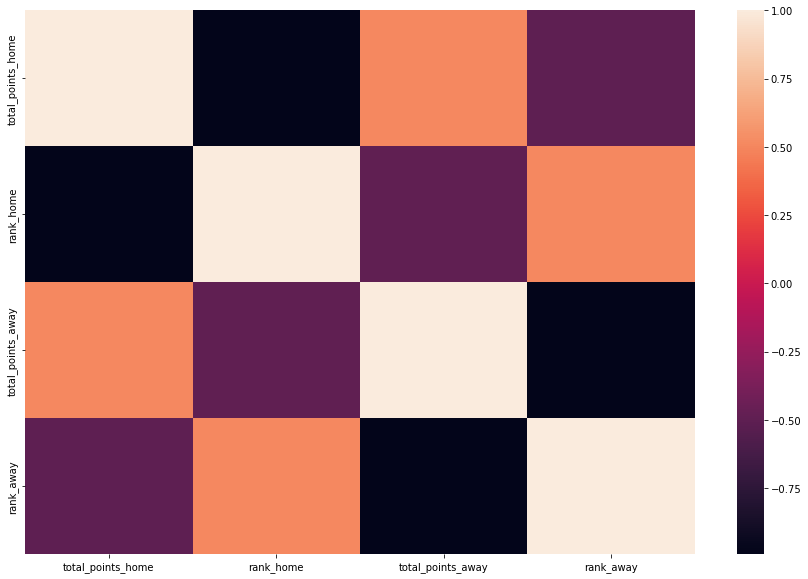

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
sns.heatmap(df[["total_points_home", "rank_home", "total_points_away", "rank_away"]].corr())
plt.show()

In [24]:
df["rank_dif"] = df["rank_home"] - df["rank_away"]
df["sg"] = df["home_score"] - df["away_score"]
df["points_home_by_rank"] = df["home_team_points"]/df["rank_away"]
df["points_away_by_rank"] = df["away_team_points"]/df["rank_home"]

In [25]:
home_team = df[["date", "home_team", "home_score", "away_score", "rank_home", "rank_away","rank_change_home", "total_points_home", "result", "rank_dif", "points_home_by_rank", "home_team_points"]]

away_team = df[["date", "away_team", "away_score", "home_score", "rank_away", "rank_home","rank_change_away", "total_points_away", "result", "rank_dif", "points_away_by_rank", "away_team_points"]]

In [26]:
home_team.columns = [h.replace("home_", "").replace("_home", "").replace("away_", "suf_").replace("_away", "_suf") for h in home_team.columns]

away_team.columns = [a.replace("away_", "").replace("_away", "").replace("home_", "suf_").replace("_home", "_suf") for a in away_team.columns]

In [27]:
team_stats = home_team.append(away_team)#.sort_values("date")

C:\Users\amema\AppData\Local\Temp\ipykernel_23088\275322566.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  team_stats = home_team.append(away_team)#.sort_values("date")


In [28]:
#this column will be used to calculate features for simulation
team_stats_raw = team_stats.copy()

Now, we have a database ready to create predictive features. They will be:

- Mean goals of the team in World Cup Cycle.
- Mean goals of the team in last 5 games.
- Mean goals suffered of the team in World Cup Cycle.
- Mean goals suffered of the team in last 5 games.
- Mean FIFA Rank that team faced in World Cup Cycle.
- Mean FIFA Rank that team faced in last 5 games.
- FIFA Points won at the cycle.
- FIFA Points won in last 5 games.
- Mean game points at the Cycle.
- Mean game points at last 5 games.
- Mean game points by rank faced at the Cycle.
- Mean game points by rank faced at last 5 games.

In [29]:
stats_val = []

for index, row in team_stats.iterrows():
    team = row["team"]
    date = row["date"]
    past_games = team_stats.loc[(team_stats["team"] == team) & (team_stats["date"] < date)].sort_values(by=['date'], ascending=False)
    last5 = past_games.head(5)
    
    goals = past_games["score"].mean()
    goals_l5 = last5["score"].mean()
    
    goals_suf = past_games["suf_score"].mean()
    goals_suf_l5 = last5["suf_score"].mean()
    
    rank = past_games["rank_suf"].mean()
    rank_l5 = last5["rank_suf"].mean()
    
    if len(last5) > 0:
        points = past_games["total_points"].values[0] - past_games["total_points"].values[-1]#qtd de pontos ganhos
        points_l5 = last5["total_points"].values[0] - last5["total_points"].values[-1] 
    else:
        points = 0
        points_l5 = 0
        
    gp = past_games["team_points"].mean()
    gp_l5 = last5["team_points"].mean()
    
    gp_rank = past_games["points_by_rank"].mean()
    gp_rank_l5 = last5["points_by_rank"].mean()
    
    stats_val.append([goals, goals_l5, goals_suf, goals_suf_l5, rank, rank_l5, points, points_l5, gp, gp_l5, gp_rank, gp_rank_l5])

In [30]:
stats_cols = ["goals_mean", "goals_mean_l5", "goals_suf_mean", "goals_suf_mean_l5", "rank_mean", "rank_mean_l5", "points_mean", "points_mean_l5", "game_points_mean", "game_points_mean_l5", "game_points_rank_mean", "game_points_rank_mean_l5"]

stats_df = pd.DataFrame(stats_val, columns=stats_cols)

full_df = pd.concat([team_stats.reset_index(drop=True), stats_df], axis=1, ignore_index=False)

In [31]:
home_team_stats = full_df.iloc[:int(full_df.shape[0]/2),:]
away_team_stats = full_df.iloc[int(full_df.shape[0]/2):,:]

In [32]:
home_team_stats.columns[-12:]

Index(['goals_mean', 'goals_mean_l5', 'goals_suf_mean', 'goals_suf_mean_l5',
       'rank_mean', 'rank_mean_l5', 'points_mean', 'points_mean_l5',
       'game_points_mean', 'game_points_mean_l5', 'game_points_rank_mean',
       'game_points_rank_mean_l5'],
      dtype='object')

In [33]:
home_team_stats = home_team_stats[home_team_stats.columns[-12:]]
away_team_stats = away_team_stats[away_team_stats.columns[-12:]]

In [34]:
home_team_stats.columns = ['home_'+str(col) for col in home_team_stats.columns]
away_team_stats.columns = ['away_'+str(col) for col in away_team_stats.columns]

In [35]:
match_stats = pd.concat([home_team_stats, away_team_stats.reset_index(drop=True)], axis=1, ignore_index=False)

In [36]:
full_df = pd.concat([df, match_stats.reset_index(drop=True)], axis=1, ignore_index=False)

In [37]:
full_df.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral', 'total_points_home',
       'previous_points_home', 'rank_home', 'rank_change_home',
       'total_points_away', 'previous_points_away', 'rank_away',
       'rank_change_away', 'result', 'home_team_points', 'away_team_points',
       'rank_dif', 'sg', 'points_home_by_rank', 'points_away_by_rank',
       'home_goals_mean', 'home_goals_mean_l5', 'home_goals_suf_mean',
       'home_goals_suf_mean_l5', 'home_rank_mean', 'home_rank_mean_l5',
       'home_points_mean', 'home_points_mean_l5', 'home_game_points_mean',
       'home_game_points_mean_l5', 'home_game_points_rank_mean',
       'home_game_points_rank_mean_l5', 'away_goals_mean',
       'away_goals_mean_l5', 'away_goals_suf_mean', 'away_goals_suf_mean_l5',
       'away_rank_mean', 'away_rank_mean_l5', 'away_points_mean',
       'away_points_mean_l5', 'away_game_points_mean',
       'away_game_points_mean_l5', 'away_

In [38]:
def find_friendly(x):
    if x == "Friendly":
        return 1
    else: return 0

full_df["is_friendly"] = full_df["tournament"].apply(lambda x: find_friendly(x)) 

In [39]:
full_df = pd.get_dummies(full_df, columns=["is_friendly"])

In [40]:
full_df.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral', 'total_points_home',
       'previous_points_home', 'rank_home', 'rank_change_home',
       'total_points_away', 'previous_points_away', 'rank_away',
       'rank_change_away', 'result', 'home_team_points', 'away_team_points',
       'rank_dif', 'sg', 'points_home_by_rank', 'points_away_by_rank',
       'home_goals_mean', 'home_goals_mean_l5', 'home_goals_suf_mean',
       'home_goals_suf_mean_l5', 'home_rank_mean', 'home_rank_mean_l5',
       'home_points_mean', 'home_points_mean_l5', 'home_game_points_mean',
       'home_game_points_mean_l5', 'home_game_points_rank_mean',
       'home_game_points_rank_mean_l5', 'away_goals_mean',
       'away_goals_mean_l5', 'away_goals_suf_mean', 'away_goals_suf_mean_l5',
       'away_rank_mean', 'away_rank_mean_l5', 'away_points_mean',
       'away_points_mean_l5', 'away_game_points_mean',
       'away_game_points_mean_l5', 'away_

In [41]:
base_df = full_df[["date", "home_team", "away_team", "rank_home", "rank_away","home_score", "away_score","result", "rank_dif", "rank_change_home", "rank_change_away", 'home_goals_mean',
       'home_goals_mean_l5', 'home_goals_suf_mean', 'home_goals_suf_mean_l5',
       'home_rank_mean', 'home_rank_mean_l5', 'home_points_mean',
       'home_points_mean_l5', 'away_goals_mean', 'away_goals_mean_l5',
       'away_goals_suf_mean', 'away_goals_suf_mean_l5', 'away_rank_mean',
       'away_rank_mean_l5', 'away_points_mean', 'away_points_mean_l5','home_game_points_mean', 'home_game_points_mean_l5',
       'home_game_points_rank_mean', 'home_game_points_rank_mean_l5','away_game_points_mean',
       'away_game_points_mean_l5', 'away_game_points_rank_mean',
       'away_game_points_rank_mean_l5',
       'is_friendly_0', 'is_friendly_1']]

base_df.tail()

,date,home_team,away_team,rank_home,rank_away,home_score,away_score,result,rank_dif,rank_change_home,...,home_game_points_mean,home_game_points_mean_l5,home_game_points_rank_mean,home_game_points_rank_mean_l5,away_game_points_mean,away_game_points_mean_l5,away_game_points_rank_mean,away_game_points_rank_mean_l5,is_friendly_0,is_friendly_1
3334,2022-09-27,Norway,Serbia,36.0,25.0,0,2,1,11.0,0.0,...,1.833333,2.0,0.041984,0.090235,1.866667,2.0,0.053327,0.073887,1,0
3335,2022-09-27,Sweden,Slovenia,20.0,65.0,1,1,2,-45.0,0.0,...,1.607843,0.6,0.048520,0.009231,1.404762,1.0,0.026035,0.029545,1,0
3336,2022-09-27,Kosovo,Cyprus,106.0,108.0,5,1,0,-2.0,0.0,...,1.326087,1.2,0.018478,0.016825,0.767442,1.0,0.009687,0.019652,1,0
3337,2022-09-27,Greece,Northern Ireland,49.0,58.0,3,1,0,-9.0,1.0,...,1.590909,2.4,0.050090,0.028040,1.139535,1.0,0.022315,0.009470,1,0
3338,2022-09-30,Fiji,Solomon Islands,163.0,137.0,1,0,0,26.0,0.0,...,1.500000,1.4,0.009432,0.008868,1.714286,2.0,0.010013,0.012387,1,0


In [42]:
base_df.isna().sum()

date                               0
home_team                          0
away_team                          0
rank_home                          0
rank_away                          0
home_score                         0
away_score                         0
result                             0
rank_dif                           0
rank_change_home                   0
rank_change_away                   0
home_goals_mean                  101
home_goals_mean_l5               101
home_goals_suf_mean              101
home_goals_suf_mean_l5           101
home_rank_mean                   101
home_rank_mean_l5                101
home_points_mean                   0
home_points_mean_l5                0
away_goals_mean                  100
away_goals_mean_l5               100
away_goals_suf_mean              100
away_goals_suf_mean_l5           100
away_rank_mean                   100
away_rank_mean_l5                100
away_points_mean                   0
away_points_mean_l5                0
h

In [43]:
base_df_no_fg = base_df.dropna()

In [44]:
df = base_df_no_fg

In [45]:
def no_draw(x):
    if x == 2:
        return 1
    else:
        return x
    
df["target"] = df["result"].apply(lambda x: no_draw(x))

C:\Users\amema\AppData\Local\Temp\ipykernel_23088\1906038641.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["target"] = df["result"].apply(lambda x: no_draw(x))


In [46]:
def create_db(df):
    columns = ["home_team", "away_team", "target", "rank_dif", "home_goals_mean", "home_rank_mean", "away_goals_mean", "away_rank_mean", "home_rank_mean_l5", "away_rank_mean_l5", "home_goals_suf_mean", "away_goals_suf_mean", "home_goals_mean_l5", "away_goals_mean_l5", "home_goals_suf_mean_l5", "away_goals_suf_mean_l5", "home_game_points_rank_mean", "home_game_points_rank_mean_l5", "away_game_points_rank_mean", "away_game_points_rank_mean_l5","is_friendly_0", "is_friendly_1"]
    
    base = df.loc[:, columns]
    base.loc[:, "goals_dif"] = base["home_goals_mean"] - base["away_goals_mean"]
    base.loc[:, "goals_dif_l5"] = base["home_goals_mean_l5"] - base["away_goals_mean_l5"]
    base.loc[:, "goals_suf_dif"] = base["home_goals_suf_mean"] - base["away_goals_suf_mean"]
    base.loc[:, "goals_suf_dif_l5"] = base["home_goals_suf_mean_l5"] - base["away_goals_suf_mean_l5"]
    base.loc[:, "goals_per_ranking_dif"] = (base["home_goals_mean"] / base["home_rank_mean"]) - (base["away_goals_mean"] / base["away_rank_mean"])
    base.loc[:, "dif_rank_agst"] = base["home_rank_mean"] - base["away_rank_mean"]
    base.loc[:, "dif_rank_agst_l5"] = base["home_rank_mean_l5"] - base["away_rank_mean_l5"]
    base.loc[:, "dif_points_rank"] = base["home_game_points_rank_mean"] - base["away_game_points_rank_mean"]
    base.loc[:, "dif_points_rank_l5"] = base["home_game_points_rank_mean_l5"] - base["away_game_points_rank_mean_l5"]
    
    model_df = base[["home_team", "away_team", "target", "rank_dif", "goals_dif", "goals_dif_l5", "goals_suf_dif", "goals_suf_dif_l5", "goals_per_ranking_dif", "dif_rank_agst", "dif_rank_agst_l5", "dif_points_rank", "dif_points_rank_l5", "is_friendly_0", "is_friendly_1"]]
    return model_df

In [47]:
model_db = create_db(df)

In [48]:
model_db

,home_team,away_team,target,rank_dif,goals_dif,goals_dif_l5,goals_suf_dif,goals_suf_dif_l5,goals_per_ranking_dif,dif_rank_agst,dif_rank_agst_l5,dif_points_rank,dif_points_rank_l5,is_friendly_0,is_friendly_1
4,Barbados,Cuba,1,-21.0,2.000000,2.0,1.000000,1.0,0.037037,-92.000000,-92.0,0.018519,0.018519,0,1
6,Barbados,Cuba,1,-21.0,1.000000,1.0,0.500000,0.5,0.008511,-35.500000,-35.5,0.008897,0.008897,0,1
31,Mongolia,Guam,1,-4.0,4.000000,4.0,-1.000000,-1.0,0.021622,0.000000,0.0,0.016216,0.016216,1,0
32,Nepal,Bhutan,0,-22.0,1.000000,1.0,0.000000,0.0,0.004975,7.000000,7.0,0.000000,0.000000,1,0
33,Bangladesh,Pakistan,0,-7.0,-1.000000,-1.0,-0.500000,-0.5,-0.007200,30.500000,30.5,-0.010437,-0.010437,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3334,Norway,Serbia,1,11.0,-0.038095,-0.8,-0.230159,0.0,-0.005282,9.014286,-3.4,-0.011343,0.016348,1,0
3335,Sweden,Slovenia,1,-45.0,0.030812,0.2,0.137255,0.2,0.009459,-25.102241,10.2,0.022485,-0.020314,1,0
3336,Kosovo,Cyprus,0,-2.0,0.667341,0.6,-0.463094,0.0,0.007625,7.037917,1.6,0.008791,-0.002827,1,0
3337,Greece,Northern Ireland,0,-9.0,0.067653,0.2,-0.369979,-1.2,-0.002915,16.024841,0.6,0.027775,0.018570,1,0


# The model

Maintenant que nous avons une base de données prête et avec des colonnes à pouvoir prédictif, nous pouvons commencer notre modélisation.

Deux modèles seront testés : Random Forest et Gradient Boosting. Le sélectionné sera celui avec le meilleur rappel.

In [49]:
X = model_db.iloc[:, 3:]
y = model_db[["target"]]

In [50]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=1)

In [52]:
import numpy as np

In [53]:
gb = GradientBoostingClassifier(random_state=5)

params = {"learning_rate": [0.01, 0.1, 0.5],
            "min_samples_split": [5, 10],
            "min_samples_leaf": [3, 5],
            "max_depth":[3,5,10],
            "max_features":["sqrt"],
            "n_estimators":[100, 200]
         } 

gb_cv = GridSearchCV(gb, params, cv = 3, n_jobs = -1, verbose = False)

gb_cv.fit(X_train.values, np.ravel(y_train))

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=5),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.5],
                         'max_depth': [3, 5, 10], 'max_features': ['sqrt'],
                         'min_samples_leaf': [3, 5],
                         'min_samples_split': [5, 10],
                         'n_estimators': [100, 200]},
             verbose=False)

In [54]:
gb = gb_cv.best_estimator_

In [55]:
gb

GradientBoostingClassifier(learning_rate=0.01, max_features='sqrt',
                           min_samples_leaf=3, min_samples_split=5,
                           n_estimators=200, random_state=5)

In [56]:
params_rf = {"max_depth": [20],
                "min_samples_split": [10],
                "max_leaf_nodes": [175],
                "min_samples_leaf": [5],
                "n_estimators": [250],
                 "max_features": ["sqrt"],
                }

rf = RandomForestClassifier(random_state=1)

rf_cv = GridSearchCV(rf, params_rf, cv = 3, n_jobs = -1, verbose = False)

rf_cv.fit(X_train.values, np.ravel(y_train))

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=1), n_jobs=-1,
             param_grid={'max_depth': [20], 'max_features': ['sqrt'],
                         'max_leaf_nodes': [175], 'min_samples_leaf': [5],
                         'min_samples_split': [10], 'n_estimators': [250]},
             verbose=False)

In [57]:
rf = rf_cv.best_estimator_

In [58]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

In [59]:
def analyze(model):
    fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test.values)[:,1]) #test AUC
    plt.figure(figsize=(15,10))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr, label="test")

    fpr_train, tpr_train, _ = roc_curve(y_train, model.predict_proba(X_train.values)[:,1]) #train AUC
    plt.plot(fpr_train, tpr_train, label="train")
    auc_test = roc_auc_score(y_test, model.predict_proba(X_test.values)[:,1])
    auc_train = roc_auc_score(y_train, model.predict_proba(X_train.values)[:,1])
    plt.legend()
    plt.title('AUC score is %.2f on test and %.2f on training'%(auc_test, auc_train))
    plt.show()
    
    plt.figure(figsize=(15, 10))
    cm = confusion_matrix(y_test, model.predict(X_test.values))
    sns.heatmap(cm, annot=True, fmt="d")

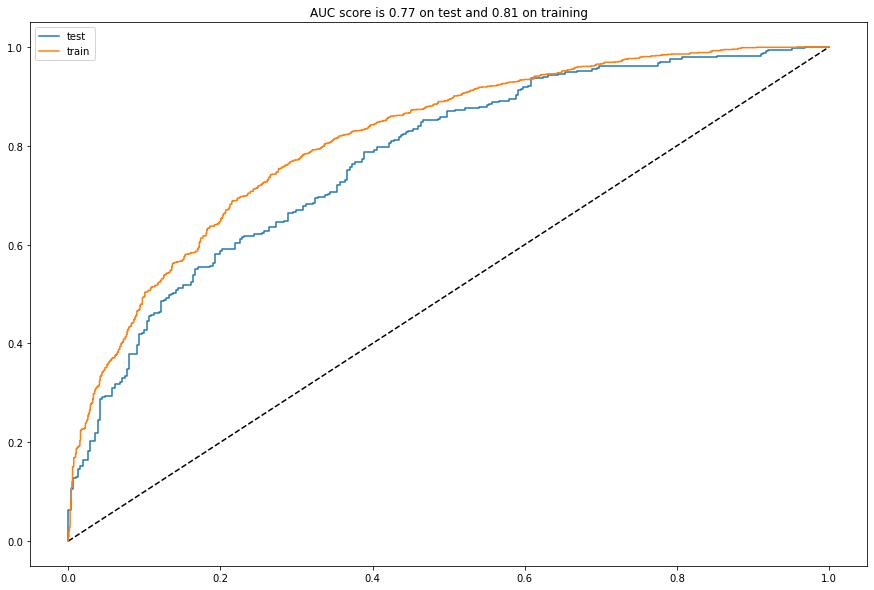

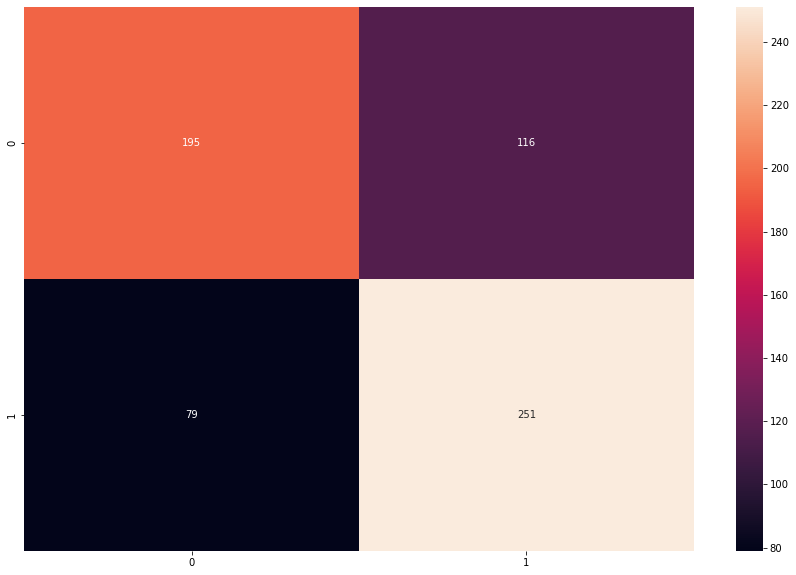

In [60]:
analyze(gb)

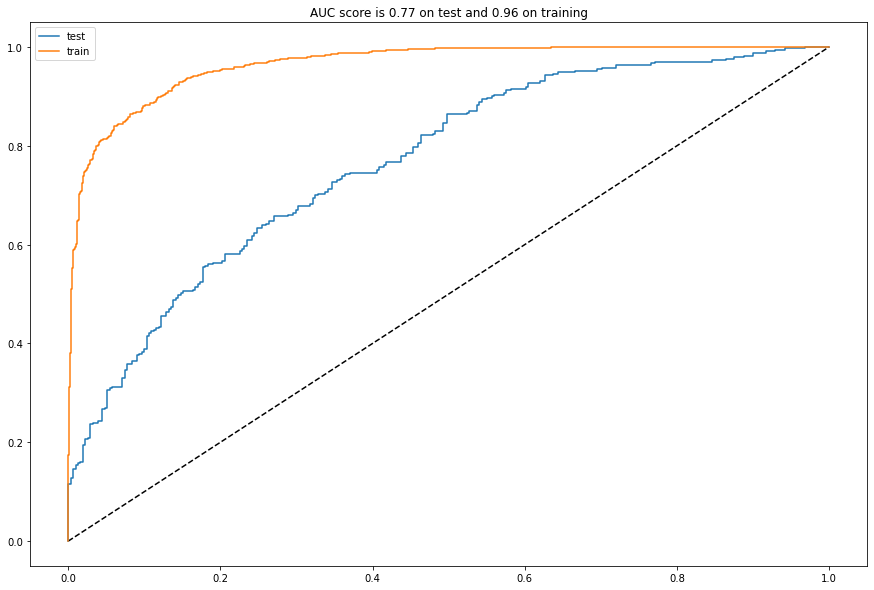

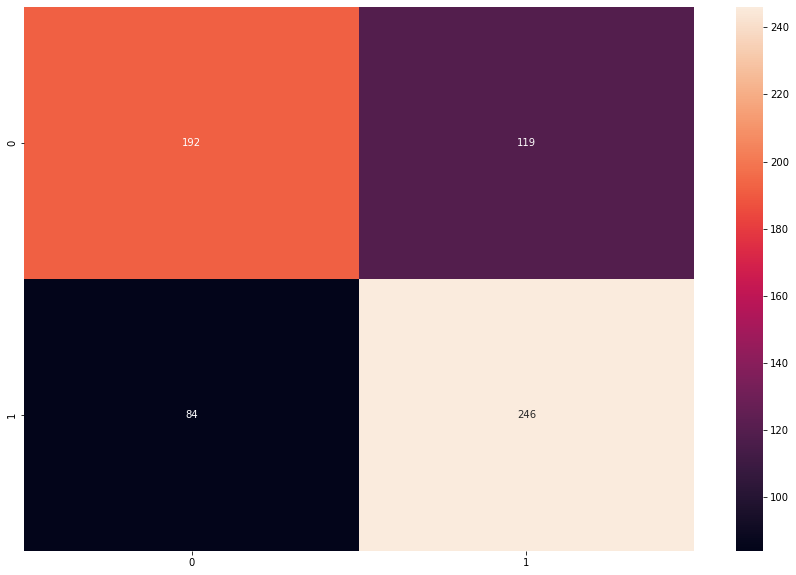

In [61]:
analyze(rf)

Le modèle Random Forest est un peu meilleur mais semble sous-ajusté. Nous allons donc utiliser le modèle Gradient Boosting.

# WC Simulation



In [62]:
matches = []
groups = ["A", "B"]
matches.append((groups[0],'Argentina', 'Croatia'))
matches.append((groups[1],'Morocco', 'France'))

In [63]:
def find_stats(team_1):
    past_games = team_stats_raw[(team_stats_raw["team"] == team_1)].sort_values("date")
    last5 = team_stats_raw[(team_stats_raw["team"] == team_1)].sort_values("date").tail(5)

    team_1_rank = past_games["rank"].values[-1]
    team_1_goals = past_games.score.mean()
    team_1_goals_l5 = last5.score.mean()
    team_1_goals_suf = past_games.suf_score.mean()
    team_1_goals_suf_l5 = last5.suf_score.mean()
    team_1_rank_suf = past_games.rank_suf.mean()
    team_1_rank_suf_l5 = last5.rank_suf.mean()
    team_1_gp_rank = past_games.points_by_rank.mean()
    team_1_gp_rank_l5 = last5.points_by_rank.mean()

    return [team_1_rank, team_1_goals, team_1_goals_l5, team_1_goals_suf, team_1_goals_suf_l5, team_1_rank_suf, team_1_rank_suf_l5, team_1_gp_rank, team_1_gp_rank_l5]

In [64]:
def find_features(team_1, team_2):
    rank_dif = team_1[0] - team_2[0]
    goals_dif = team_1[1] - team_2[1]
    goals_dif_l5 = team_1[2] - team_2[2]
    goals_suf_dif = team_1[3] - team_2[3]
    goals_suf_dif_l5 = team_1[4] - team_2[4]
    goals_per_ranking_dif = (team_1[1]/team_1[5]) - (team_2[1]/team_2[5])
    dif_rank_agst = team_1[5] - team_2[5]
    dif_rank_agst_l5 = team_1[6] - team_2[6]
    dif_gp_rank = team_1[7] - team_2[7]
    dif_gp_rank_l5 = team_1[8] - team_2[8]
    
    return [rank_dif, goals_dif, goals_dif_l5, goals_suf_dif, goals_suf_dif_l5, goals_per_ranking_dif, dif_rank_agst, dif_rank_agst_l5, dif_gp_rank, dif_gp_rank_l5, 1, 0]

Maintenant, nous sommes capables de simuler.

Étant donné que le modèle simule si l'équipe 1 gagnera ou non, il est nécessaire de créer des critères pour définir un match nul. De plus, puisque nous n'avons pas l'avantage du terrain à la Coupe du monde, l'idée est de prédire le match deux fois, en changeant l'équipe 1 et l'équipe 2. L'équipe avec la moyenne de probabilités la plus élevée sera désignée comme vainqueur. Lors de la phase de groupes, si "l'équipe à domicile" gagne avec l'équipe 1 et perd avec l'équipe 2, ou si "l'équipe à domicile" gagne avec l'équipe 2 et perd avec l'équipe 1, un match nul sera attribué dans ce match.

In [68]:
import numpy as np

advanced_group = []
last_group = ""


# Define the groups and teams
groups = ["A", "B"]
teams_group_A = ['Argentina', 'Croatia']
teams_group_B = ['Morocco', 'France']

# Initialize the table dictionary with the group keys and empty lists
table = {group: [] for group in groups}

# Add teams to the respective groups in the table dictionary
for team in teams_group_A:
    table['A'].append([team, 0, []])
for team in teams_group_B:
    table['B'].append([team, 0, []])

# Simulate the matches
for teams in matches:
    draw = False
    team_1 = find_stats(teams[1])
    team_2 = find_stats(teams[2])

    features_g1 = find_features(team_1, team_2)
    features_g2 = find_features(team_2, team_1)

    # Simulate the match using team 1 as home team
    probs_g1 = gb.predict_proba([features_g1])
    team_1_prob_g1 = probs_g1[0][0]
    team_2_prob_g1 = probs_g1[0][1]

    # Simulate the match using team 2 as home team
    probs_g2 = gb.predict_proba([features_g2])
    team_1_prob_g2 = probs_g2[0][1]
    team_2_prob_g2 = probs_g2[0][0]

    team_1_prob = (team_1_prob_g1 + team_2_prob_g2) / 2
    team_2_prob = (team_2_prob_g1 + team_1_prob_g2) / 2

    if ((team_1_prob_g1 > team_2_prob_g1) and (team_2_prob_g2 > team_1_prob_g2)) or ((team_1_prob_g1 < team_2_prob_g1) and (team_2_prob_g2 < team_1_prob_g2)):
        draw = True
        for i in table[teams[0]]:
            if i[0] == teams[1] or i[0] == teams[2]:
                i[1] += 1
                
    elif team_1_prob > team_2_prob:
        winner = teams[1]
        winner_proba = team_1_prob
        for i in table[teams[0]]:
            if i[0] == teams[1]:
                i[1] += 3
                
    elif team_2_prob > team_1_prob:  
        winner = teams[2]
        winner_proba = team_2_prob
        for i in table[teams[0]]:
            if i[0] == teams[2]:
                i[1] += 3
    
    for i in table[teams[0]]:
        if i[0] == teams[1]:
            i[2].append(team_1_prob)
        if i[0] == teams[2]:
            i[2].append(team_2_prob)

    if last_group != teams[0]:
        if last_group != "":
            print("\n")
            print("Group %s advanced: " % last_group)

            for i in table[last_group]:
                i[2] = np.mean(i[2])
            
            final_points = table[last_group]
            final_table = sorted(final_points, key=lambda x: (x[1], x[2]), reverse=True)
            advanced_group.append([final_table[0][0], final_table[1][0]])
            for i in final_table:
                print("%s -------- %d" % (i[0], i[1]))
        
        print("\n")
        print("-" * 10 + " Starting Analysis for Group %s " % teams[0] + "-" * 10)

    if draw == False:
        print("Group %s - %s vs. %s: Winner %s with %.2f probability" % (teams[0], teams[1], teams[2], winner, winner_proba))
    else:
        print("Group %s - %s vs. %s: Draw" % (teams[0], teams[1], teams[2]))
    last_group = teams[0]

print("\n")
print("Group %s advanced: " % last_group)

for i in table[last_group]:
    i[2] = np.mean(i[2])

final_points = table[last_group]
final_table = sorted(final_points, key=lambda x: (x[1], x[2]), reverse=True)
advanced_group.append([final_table[0][0], final_table[1][0]])
for i in final_table:
    print("%s -------- %d" % (i[0], i[1]))




---------- Starting Analysis for Group A ----------
Group A - Argentina vs. Croatia: Winner Croatia with 0.60 probability


Group A advanced: 
Croatia -------- 3
Argentina -------- 0


---------- Starting Analysis for Group B ----------
Group B - Morocco vs. France: Winner France with 0.59 probability


Group B advanced: 
France -------- 3
Morocco -------- 0


In [69]:
advanced = advanced_group

In [70]:
playoffs = { "Semi-Final": [], "Final": []}

In [71]:
for p in playoffs.keys():
    playoffs[p] = []

actual_round = ""
next_rounds = []

for p in playoffs.keys():
    if p ==  "Semi-Final":
        control = []
        for a in range(0, len(advanced*2), 1):
            if a < len(advanced):
                if a % 2 == 0:
                    control.append((advanced*2)[a][0])
                else:
                    control.append((advanced*2)[a][1])
            else:
                if a % 2 == 0:
                    control.append((advanced*2)[a][1])
                else:
                    control.append((advanced*2)[a][0])

        playoffs[p] = [[control[c], control[c+1]] for c in range(0, len(control)-1, 1) if c%2 == 0]
        
        for i in range(0, len(playoffs[p]), 1):
            game = playoffs[p][i]
            
            home = game[0]
            away = game[1]
            team_1 = find_stats(home)
            team_2 = find_stats(away)

            features_g1 = find_features(team_1, team_2)
            features_g2 = find_features(team_2, team_1)
            
            probs_g1 = gb.predict_proba([features_g1])
            probs_g2 = gb.predict_proba([features_g2])
            
            team_1_prob = (probs_g1[0][0] + probs_g2[0][1])/2
            team_2_prob = (probs_g2[0][0] + probs_g1[0][1])/2
            
            if actual_round != p:
                print("-"*10)
                print("Starting simulation of %s"%(p))
                print("-"*10)
                print("\n")
            
            if team_1_prob < team_2_prob:
                print("%s vs. %s: %s advances with prob %.2f"%(home, away, away, team_2_prob))
                next_rounds.append(away)
            else:
                print("%s vs. %s: %s advances with prob %.2f"%(home, away, home, team_1_prob))
                next_rounds.append(home)
            
            game.append([team_1_prob, team_2_prob])
            playoffs[p][i] = game
            actual_round = p
        
    else:
        playoffs[p] = [[next_rounds[c], next_rounds[c+1]] for c in range(0, len(next_rounds)-1, 1) if c%2 == 0]
        next_rounds = []
        for i in range(0, len(playoffs[p])):
            game = playoffs[p][i]
            home = game[0]
            away = game[1]
            team_1 = find_stats(home)
            team_2 = find_stats(away)
            
            features_g1 = find_features(team_1, team_2)
            features_g2 = find_features(team_2, team_1)
            
            probs_g1 = gb.predict_proba([features_g1])
            probs_g2 = gb.predict_proba([features_g2])
            
            team_1_prob = (probs_g1[0][0] + probs_g2[0][1])/2
            team_2_prob = (probs_g2[0][0] + probs_g1[0][1])/2
            
            if actual_round != p:
                print("-"*10)
                print("Starting simulation of %s"%(p))
                print("-"*10)
                print("\n")
            
            if team_1_prob < team_2_prob:
                print("%s vs. %s: %s advances with prob %.2f"%(home, away, away, team_2_prob))
                next_rounds.append(away)
            else:
                print("%s vs. %s: %s advances with prob %.2f"%(home, away, home, team_1_prob))
                next_rounds.append(home)
            game.append([team_1_prob, team_2_prob])
            playoffs[p][i] = game
            actual_round = p
            

----------
Starting simulation of Semi-Final
----------


Croatia vs. Morocco: Croatia advances with prob 0.58
Argentina vs. France: Argentina advances with prob 0.53
----------
Starting simulation of Final
----------


Croatia vs. Argentina: Argentina advances with prob 0.65
